# Random forest model

### using income level as features




In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

In [14]:
# Read the csv file and convert to dataframe
inflation_df = pd.read_csv("./resources/inflation_gdp.csv",encoding="latin1")
inflation_df.head()

,country,year,"Inflation, consumer prices (annual %)","Inflation, GDP deflator (annual %)",Real interest rate (%),Deposit interest rate (%),Lending interest rate (%),"Unemployment, total (% of total labor force) (national estimate)","Unemployment, total (% of total labor force) (modeled ILO estimate)",iso3c,iso2c,adminregion,incomeLevel
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
1,Afghanistan,1971,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
2,Afghanistan,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
3,Afghanistan,1973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income
4,Afghanistan,1974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AFG,AF,South Asia,Low income


In [15]:
# rename columns
inflation_df = inflation_df.rename(columns = {'Inflation, consumer prices (annual %)' : 'Inflation', "Inflation, GDP deflator (annual %)" : "GDP","Real interest rate (%)" : "interestRate", "Unemployment, total (% of total labor force) (national estimate)" : "unemployment"})
inflation_df.head()

# select rhe required columns
inflation_df = inflation_df[['country', 'year', 'Inflation', 'GDP', 'interestRate', 'unemployment']]
inflation_df

# # remove the null data
# remove the null data
clean_inflation_df = inflation_df.dropna()

# clean_inflation_df = clean_inflation_df.drop(columns = ['incomeLevel'])

clean_inflation_df

,country,year,Inflation,GDP,interestRate,unemployment
38,Afghanistan,2008,26.418664,2.096289,12.557960,2.490000
42,Afghanistan,2012,6.441213,7.301756,7.174387,1.690000
44,Afghanistan,2014,4.673996,0.566945,14.351689,7.910000
47,Afghanistan,2017,4.975952,2.403656,12.141178,11.180000
178,Albania,1992,226.005421,232.984659,-63.787120,26.500000
...,...,...,...,...,...,...
13775,Zambia,2017,6.577312,10.095730,2.070262,12.170000
13776,Zambia,2018,7.494572,7.411571,2.215865,12.010000
13777,Zambia,2019,9.150316,7.633470,2.469674,12.520000
13824,Zimbabwe,2014,-0.197785,-0.252141,9.744210,4.770000


In [16]:
# generate the outcomes based on the inflation rates
outcome = []
for row in clean_inflation_df['Inflation']:
    if row <= 2:
        outcome.append('0')
    else:
        outcome.append('1')
        
clean_inflation_df['outcome'] = outcome


# clean_inflation_df= clean_inflation_df.set_index('country')
clean_inflation_df

C:\Users\Avani\AppData\Local\Temp\ipykernel_24184\3590633606.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_inflation_df['outcome'] = outcome


,country,year,Inflation,GDP,interestRate,unemployment,outcome
38,Afghanistan,2008,26.418664,2.096289,12.557960,2.490000,1
42,Afghanistan,2012,6.441213,7.301756,7.174387,1.690000,1
44,Afghanistan,2014,4.673996,0.566945,14.351689,7.910000,1
47,Afghanistan,2017,4.975952,2.403656,12.141178,11.180000,1
178,Albania,1992,226.005421,232.984659,-63.787120,26.500000,1
...,...,...,...,...,...,...,...
13775,Zambia,2017,6.577312,10.095730,2.070262,12.170000,1
13776,Zambia,2018,7.494572,7.411571,2.215865,12.010000,1
13777,Zambia,2019,9.150316,7.633470,2.469674,12.520000,1
13824,Zimbabwe,2014,-0.197785,-0.252141,9.744210,4.770000,0


In [17]:
from sklearn import preprocessing

In [18]:
# to label the country column in form of numbers
le = preprocessing.LabelEncoder()

In [19]:
le.fit(clean_inflation_df['country'])

LabelEncoder()

In [20]:
clean_inflation_df['country_id'] = le.transform(clean_inflation_df['country'])

C:\Users\Avani\AppData\Local\Temp\ipykernel_24184\1335804336.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_inflation_df['country_id'] = le.transform(clean_inflation_df['country'])


In [21]:
clean_inflation_df

,country,year,Inflation,GDP,interestRate,unemployment,outcome,country_id
38,Afghanistan,2008,26.418664,2.096289,12.557960,2.490000,1,0
42,Afghanistan,2012,6.441213,7.301756,7.174387,1.690000,1,0
44,Afghanistan,2014,4.673996,0.566945,14.351689,7.910000,1,0
47,Afghanistan,2017,4.975952,2.403656,12.141178,11.180000,1,0
178,Albania,1992,226.005421,232.984659,-63.787120,26.500000,1,1
...,...,...,...,...,...,...,...,...
13775,Zambia,2017,6.577312,10.095730,2.070262,12.170000,1,139
13776,Zambia,2018,7.494572,7.411571,2.215865,12.010000,1,139
13777,Zambia,2019,9.150316,7.633470,2.469674,12.520000,1,139
13824,Zimbabwe,2014,-0.197785,-0.252141,9.744210,4.770000,0,140


In [22]:
# convert outcome as integer datatype 
clean_inflation_df= clean_inflation_df.astype({'outcome' : 'int'})
clean_inflation_df

,country,year,Inflation,GDP,interestRate,unemployment,outcome,country_id
38,Afghanistan,2008,26.418664,2.096289,12.557960,2.490000,1,0
42,Afghanistan,2012,6.441213,7.301756,7.174387,1.690000,1,0
44,Afghanistan,2014,4.673996,0.566945,14.351689,7.910000,1,0
47,Afghanistan,2017,4.975952,2.403656,12.141178,11.180000,1,0
178,Albania,1992,226.005421,232.984659,-63.787120,26.500000,1,1
...,...,...,...,...,...,...,...,...
13775,Zambia,2017,6.577312,10.095730,2.070262,12.170000,1,139
13776,Zambia,2018,7.494572,7.411571,2.215865,12.010000,1,139
13777,Zambia,2019,9.150316,7.633470,2.469674,12.520000,1,139
13824,Zimbabwe,2014,-0.197785,-0.252141,9.744210,4.770000,0,140


In [24]:
# Select the data that we want for SQL database
clean_inflation_df = clean_inflation_df[['country','country_id', 'year','Inflation', 'GDP', 'interestRate','unemployment', 'outcome']]


In [25]:
# convert the dataframe to csv
clean_inflation_df.to_csv("./Output/clean_inflation_gdp.csv", index = False)

In [26]:
# sql imports
from sqlalchemy import create_engine
from config import username, password, hostname, port, db

In [27]:
# set the sql engine
engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{hostname}:{port}/{db}')

In [28]:
# transform the dataframe to SQL database as table
clean_inflation_df.to_sql('inflation_gdp', con=engine, if_exists='replace', index=False)

228

In [193]:
# select the required columns for machine learning model
clean_inflation_df = clean_inflation_df[['country_id','year', 'GDP', 'interestRate','unemployment', 'outcome']]
clean_inflation_df

,country_id,year,GDP,interestRate,unemployment,outcome
38,0,2008,2.096289,12.557960,2.490000,1
42,0,2012,7.301756,7.174387,1.690000,1
44,0,2014,0.566945,14.351689,7.910000,1
47,0,2017,2.403656,12.141178,11.180000,1
178,1,1992,232.984659,-63.787120,26.500000,1
...,...,...,...,...,...,...
13775,139,2017,10.095730,2.070262,12.170000,1
13776,139,2018,7.411571,2.215865,12.010000,1
13777,139,2019,7.633470,2.469674,12.520000,1
13824,140,2014,-0.252141,9.744210,4.770000,0


In [194]:
# Define the X 
X = clean_inflation_df.copy()
X.drop("outcome", axis=1, inplace=True)
X

,country_id,year,GDP,interestRate,unemployment
38,0,2008,2.096289,12.557960,2.490000
42,0,2012,7.301756,7.174387,1.690000
44,0,2014,0.566945,14.351689,7.910000
47,0,2017,2.403656,12.141178,11.180000
178,1,1992,232.984659,-63.787120,26.500000
...,...,...,...,...,...
13775,139,2017,10.095730,2.070262,12.170000
13776,139,2018,7.411571,2.215865,12.010000
13777,139,2019,7.633470,2.469674,12.520000
13824,140,2014,-0.252141,9.744210,4.770000


In [195]:
# Define target vector
y = clean_inflation_df["outcome"].values.reshape(-1, 1)
y

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [196]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [197]:
# Create the StandardScaler instance
scaler = StandardScaler()
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [198]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

C:\Users\Avani\AppData\Local\Temp\ipykernel_16604\2710277837.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = rf_model.fit(X_train_scaled, y_train)


In [199]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [200]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

In [201]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [202]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,77,58
Actual 1,24,398


Accuracy Score : 0.8527827648114902
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.57      0.65       135
           1       0.87      0.94      0.91       422

    accuracy                           0.85       557
   macro avg       0.82      0.76      0.78       557
weighted avg       0.85      0.85      0.85       557



In [203]:
importances = rf_model.feature_importances_

In [204]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.4158039453006426, 'GDP'),
 (0.172692579730044, 'interestRate'),
 (0.1568673359809384, 'unemployment'),
 (0.13140343447457103, 'year'),
 (0.12323270451380385, 'country_id')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

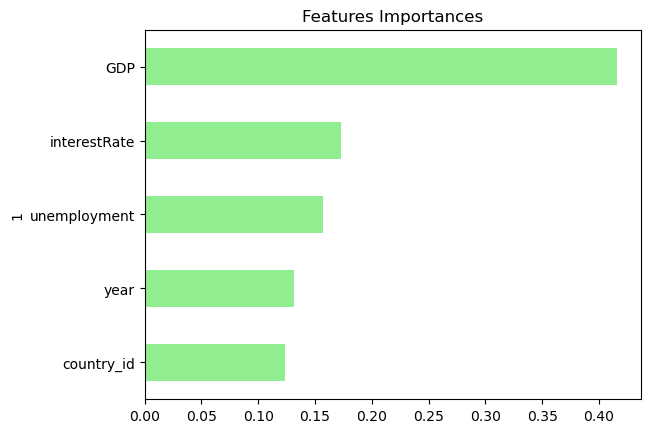

In [205]:
# # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [206]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)
rf_model.fit(X_train, y_train)
pickle.dump(rf_model, open('model.pkl', 'wb'))


C:\Users\Avani\AppData\Local\Temp\ipykernel_16604\789115362.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(X_train, y_train)


In [207]:
model = pickle.load(open('model.pkl', 'rb'))
print(model.predict([[1,2050, 10.6,10, 7.5]]))

[1]


C:\Users\Avani\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
